# Exercise: Hierarchical Cluster Analysis
You are provided with a dataset containing demographic indicators for 36 European countries. These include variables such as:

- birth and death rates  
- male and female life expectancy  
- total population and population density

Your goal is to uncover clusters of countries that share similar demographic profiles. To do this, proceed as follows:

- Design and implement a **machine learning pipeline** that prepares your data for clustering.
- Use **PCA** to reduce the dimensionality of the data and support your interpretation.
- Apply **hierarchical clustering** to identify meaningful groups of countries.
- Visualize your results using a **dendrogram** and a **PCA scatterplot**, and analyze the outcome.
- Investigate and compare **different linkage methods** (`ward`, `complete`, `average`, etc.). Justify your final choice.
- Characterize each resulting cluster: What do the countries in each group have in common? How do they differ from others?


In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
# Import PCA
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch


df = pd.read_csv("europe_demo_cleaned.csv")
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country_name            36 non-null     object 
 1   birth_rate              36 non-null     float64
 2   death_rate              36 non-null     float64
 3   male_life_expectancy    36 non-null     float64
 4   female_life_expectancy  36 non-null     float64
 5   population              36 non-null     float64
 6   population_per_sq_km    36 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


(    country_name  birth_rate  death_rate  male_life_expectancy  \
 0        Austria         9.4        10.3                  78.9   
 1        Belgium         9.9        11.0                  78.6   
 2         France        10.9         9.9                  79.2   
 3        Germany         9.3        11.9                  78.6   
 4  Liechtenstein         9.1         8.2                  80.1   
 
    female_life_expectancy  population  population_per_sq_km  
 0                    83.6   8917000.0                 106.3  
 1                    83.1  11544000.0                 378.1  
 2                    85.3  67380000.0                 122.7  
 3                    83.4  83161000.0                 232.6  
 4                    83.6     38137.0                 237.6  ,
 None)

In [ ]:
#K-Means

#Selecting numerical columns for clustering
num_df = df.drop("country_name", axis=1)

#Standardising the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

num_df.shape

(36, 6)

In [ ]:
#K-Means
kmeans = KMeans(n_clusters=3)

#Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(num_df)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [ ]:
df["Cluster_scaled"] = pipeline.fit_predict(scaled_data)
df.head()

,country_name,birth_rate,death_rate,male_life_expectancy,female_life_expectancy,population,population_per_sq_km,Cluster_scaled
0,Austria,9.4,10.3,78.9,83.6,8917000.0,106.3,0
1,Belgium,9.9,11.0,78.6,83.1,11544000.0,378.1,0
2,France,10.9,9.9,79.2,85.3,67380000.0,122.7,2
3,Germany,9.3,11.9,78.6,83.4,83161000.0,232.6,0
4,Liechtenstein,9.1,8.2,80.1,83.6,38137.0,237.6,0


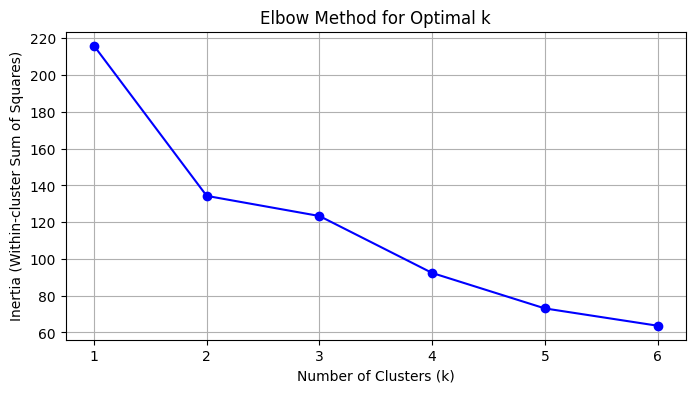

In [ ]:

#The elbow method to find the optimal number of clusters

inertia = []
ks = range(1, 7)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(ks, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.xticks(np.arange(1, 7))
plt.grid(True)
plt.show()

Lower inertia means tighter clusters, which is generally better.Choose the "elbow" point in an inertia plot. The elbow point is where inertia stops decreasing sharply.

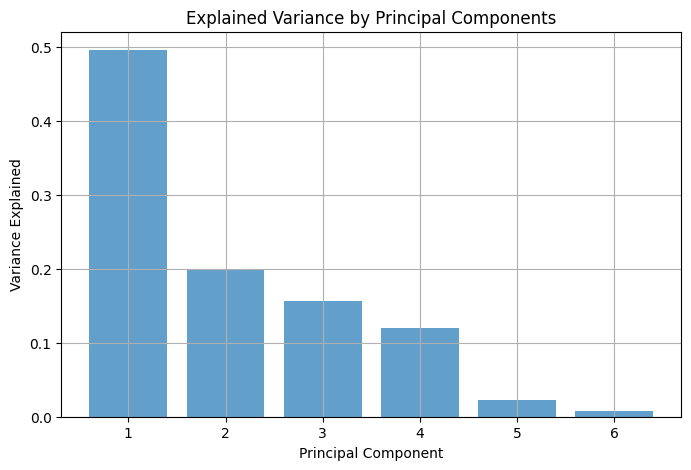

In [ ]:
#PCA
pca = PCA()
pca_components = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

#Plotting the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Explained Variance by Principal Components")
plt.grid(True)
plt.show()

#Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components[:, :2], columns=['PC1', 'PC2'])
pca_df["country_name"] = df["country_name"]



In [ ]:
#Identify missing values
pd.isnull(df).sum()

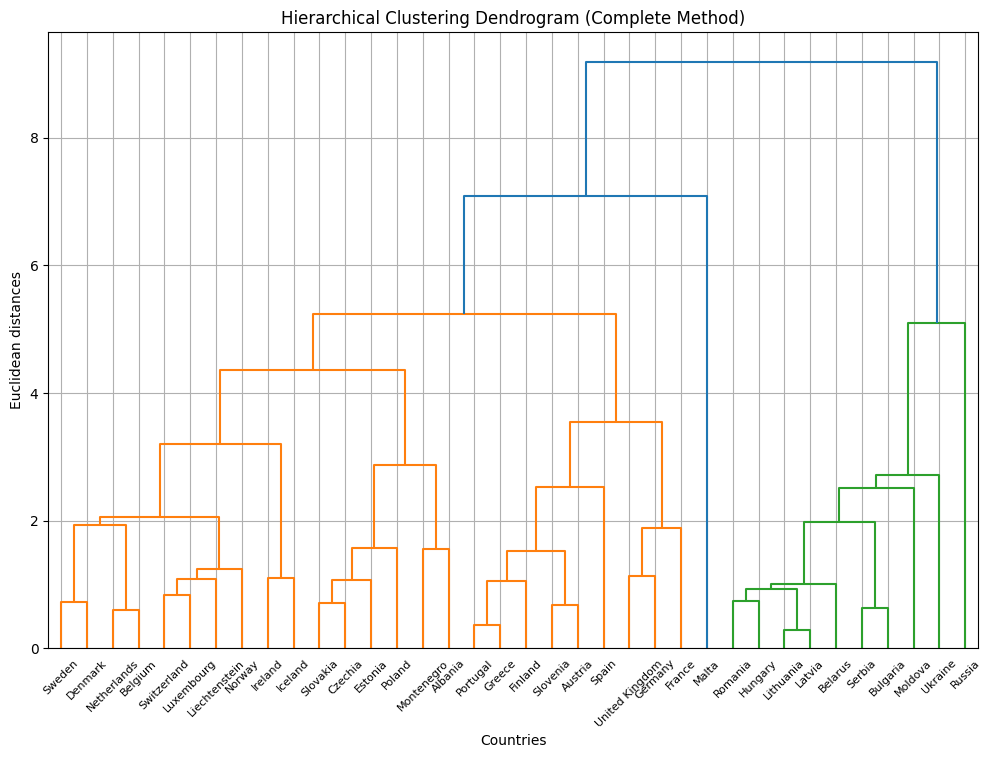

,country_name,Cluster_Complete
12,Moldova,1
11,Hungary,1
14,Romania,1
15,Russia,1
9,Bulgaria,1
8,Belarus,1
23,Latvia,1
17,Ukraine,1
24,Lithuania,1
33,Serbia,1


In [ ]:
#Complete method
linked_complete = linkage(scaled_data, method='complete')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked_complete, labels=pca_df['country_name'].values, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Complete Method)")
plt.xlabel("Countries")
plt.ylabel("Euclidean distances")
plt.grid(True)
plt.show()

# Create clusters (3 clusters for consistency)
cluster_labels_complete = fcluster(linked_complete, 3, criterion="maxclust")

# Append cluster labels to the dataframe
pca_df["Cluster_Complete"] = cluster_labels_complete

# Display grouped countries by clusters (Complete method)
clustered_data_complete = pca_df[["country_name", "Cluster_Complete"]].sort_values(by="Cluster_Complete")
clustered_data_complete

Why choose Complete method?  

1. Less sensitivity to cluster shape: Performs better than Ward when clusters have irregular shapes or different sizes
2. Robustness: Generally more robust to outliers compared to Ward’s method.


But in the scenario, it's not focusing on the clearly defined and distinct clusters. Also, Ward’s method is commonly preferred for demographic and socioeconomic datasets. So I'll continue with the Ward’s method.

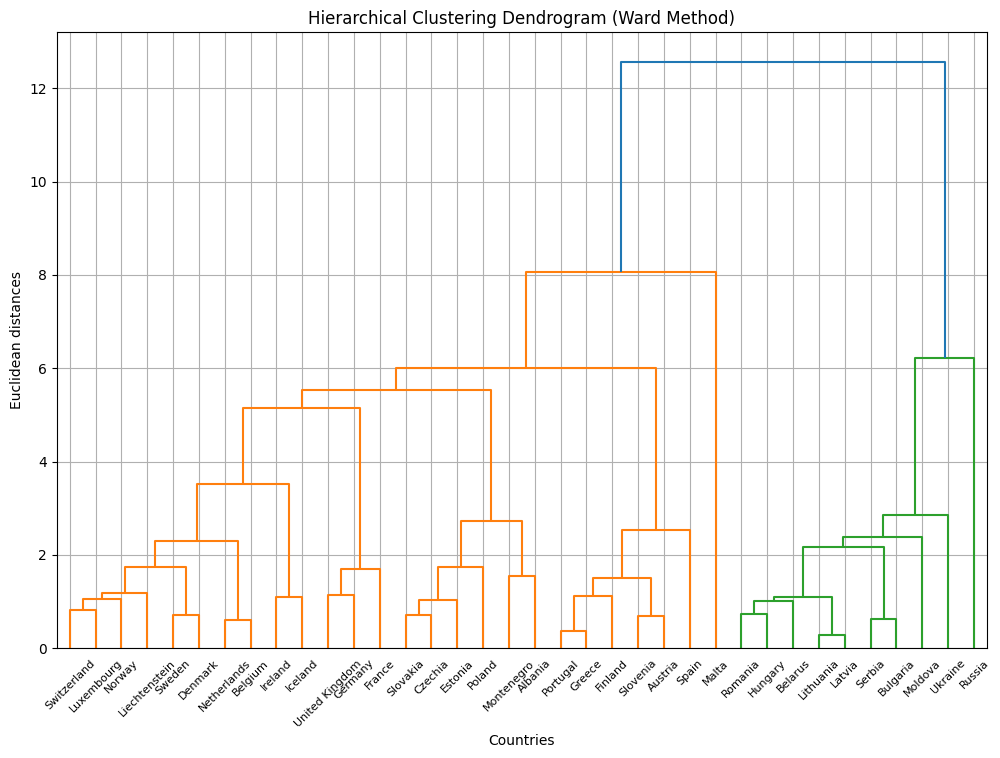

,country_name,Cluster
12,Moldova,1
11,Hungary,1
14,Romania,1
15,Russia,1
9,Bulgaria,1
8,Belarus,1
23,Latvia,1
17,Ukraine,1
24,Lithuania,1
33,Serbia,1


In [ ]:
#Hierarchical clustering
#Ward's method

linked = linkage(scaled_data, method="ward")

#Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, labels=pca_df["country_name"].values, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram (Ward Method)")
plt.xlabel("Countries")
plt.ylabel("Euclidean distances")
plt.grid(True)
plt.show()

#Create clusters
cluster_labels = fcluster(linked, 3, criterion="maxclust")

#Append cluster labels to the original dataframe
pca_df["Cluster"] = cluster_labels

#Display grouped countries by clusters
clustered_data = pca_df[["country_name", "Cluster"]].sort_values(by="Cluster")
clustered_data

Why choose the Ward’s method? Since it

1.  minimises the within-cluster variance at each step. It groups observations into clusters such that the increase in the total within-cluster variance (sum of squared errors) is minimised.
2. is typically effective in demographic, economic, or similar numerical(continuous) datasets.